## Observations and Insights 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset

result = mouse_metadata.merge(study_results, on = "Mouse ID")
# Display the data table for preview
result.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
#result["Mouse ID"].count()
len(result["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

result.loc[result.duplicated(subset=["Mouse ID", "Timepoint"], keep='last')]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = result.loc[result.duplicated(subset=["Mouse ID", "Timepoint"], keep='last')]


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = result[result['Mouse ID'].isin(duplicate_df)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
result.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to 
# calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

import numpy as np
mean = result.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#print(mean)
median = result.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
#print(median)
variance = result.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
#print(variance)
std = result.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
#print(std)
sem = result.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
#print(sem)
summary = pd.DataFrame({ "Mean Tumor Volume" : mean, 'Median Tumor Volume': median,
                        'Variance Tumor Volume': variance, 'Standard Deviation Tumor Volume': std,
                       'SEM Tumor Volume': sem })
summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = result.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

# Using the aggregation method, produce the same summary statistics in a single line
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

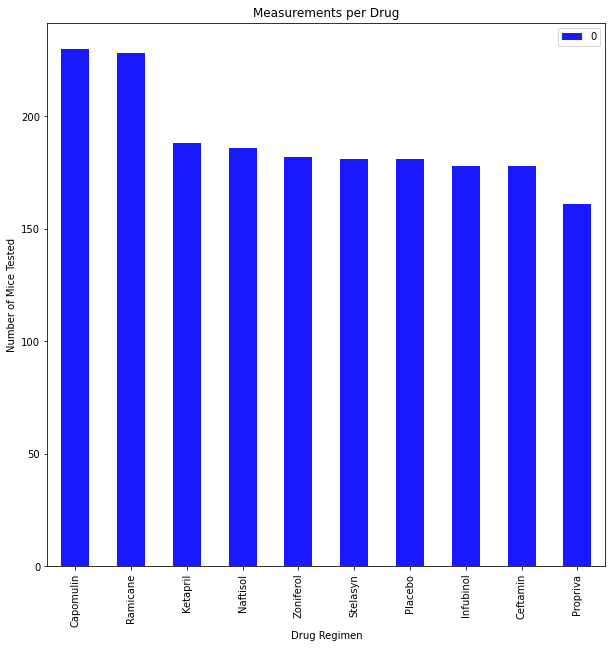

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# dataframe.plot method
jeb = result.value_counts('Drug Regimen')

df = pd.DataFrame(jeb)
df
fig, ax=plt.subplots(figsize=(10,10))
df.plot(kind='bar', ax=ax, color='blue', alpha=0.90);
ax.set(xlabel="Drug Regimen",
       ylabel="Number of Mice Tested",
       title="Measurements per Drug");



Text(0, 0.5, 'Number of Mice Tested')

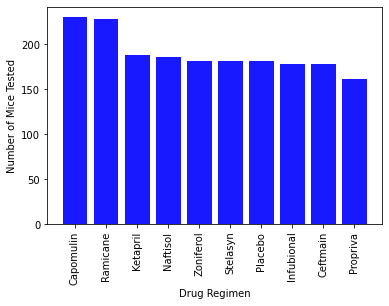

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# pyplot method
# convert df to list 
listofJeb = jeb.values.tolist()
# listofJeb
x_axis = np.arange(len(listofJeb))

plt.bar(x_axis, listofJeb, color='b', alpha=0.9, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo","Infubional", "Ceftmain", "Propriva"]
    )
# Sets the x limits of the current chart
plt.xticks(rotation=90)
# Give our chart some labels and a tile
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

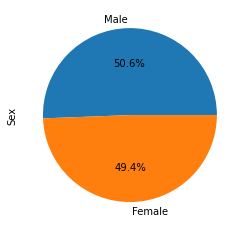

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_study_data_complete.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

([<matplotlib.patches.Wedge at 0x7fb909eb9ac0>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'male'),
  Text(0.690856410575595, 0.8559891471079556, 'female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

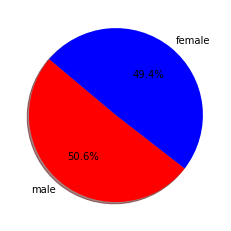

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["red", "blue"]
pies = ["male", "female"]
plt.pie(counts, colors=colors,labels = pies,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = result.groupby(["Mouse ID"])['Timepoint'].max()

# gives us Mouse ID index column to properly merge DF's
timepoint_df = timepoint_df.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined = pd.merge(result, timepoint_df)
result

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for x in treat_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = combined.loc[combined['Drug Regimen'] == x, 'Tumor Volume (mm3)']

    # Append `tumor_vols` to `tumor_vol_data`
    tumor_vol_data.append(tumor_vols)

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vols.quantile([.25,.50,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
       
    # Determine outliers using upper and lower bounds
    outliers_vols = tumor_vols.loc[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]

    print(outliers_vols)
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb909b2d4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb909b2db20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb909b2d9d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb90ae42e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb90ae42ca0>,
 'means': []}

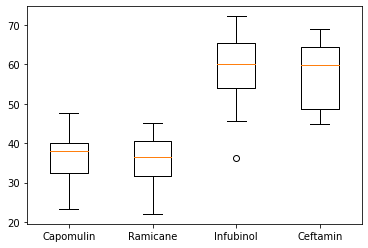

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


plt.boxplot(tumor_vol_data, labels=treat_list)

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse Weight v Tumor Volume in Capomulin Regimen')

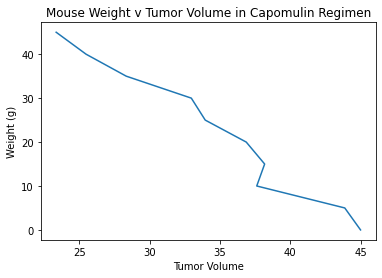

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = result.loc[result['Drug Regimen'] == 'Capomulin']
mouse1 = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']
plt.plot(mouse1['Tumor Volume (mm3)'], mouse1['Timepoint'])

#Label
plt.ylabel('Weight (g)')
plt.xlabel('Tumor Volume')
plt.title('Mouse Weight v Tumor Volume in Capomulin Regimen')

Text(0.5, 1.0, 'Mouse Weight v Average Tumor Volume in Capomulin Regimen')

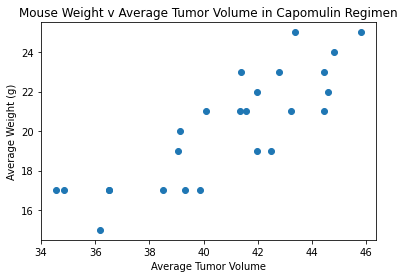

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mean_df = capomulin_df.groupby('Mouse ID').mean()
plt.scatter(mean_df['Tumor Volume (mm3)'], mean_df['Weight (g)'])

#Label
plt.ylabel('Average Weight (g)')
plt.xlabel('Average Tumor Volume')
plt.title('Mouse Weight v Average Tumor Volume in Capomulin Regimen')


## Correlation and Regression

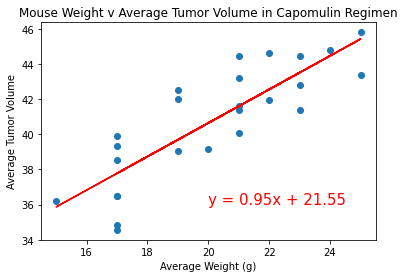

0.8419363424694718 1.3225722434712642e-07


In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = mean_df['Weight (g)']
y_values = mean_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Mouse Weight v Average Tumor Volume in Capomulin Regimen')
plt.show()
print(rvalue, pvalue)